In [ ]:
import numpy as np
from numpy import linalg as LA

# NUMPY

## 1. Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.

In [ ]:
def getMaxElement(arr):

  if (np.count_nonzero(arr) == len(arr) or
      (np.count_nonzero(arr[0:-1]) == len(arr) - 1 and arr[-1] == 0)):
     return(None)

  else:
    if arr[-1]==0:
      zero = np.where(arr[0:-1] == 0)
    else:
      zero = np.where(arr == 0)

    index = np.asarray(zero) + 1

    return(np.max(arr[index]))

In [ ]:
a = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

In [ ]:
getMaxElement(a)

5

## 2. Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [ ]:
def getNearestValue(X, v):
  if v - X[X<v][-1] > X[X>v][0] - v:
    return(X[X>v][0])
  elif v - X[X<v][-1] == X[X>v][0] - v:
    return(X[X<v][-1], X[X>v][0])
  else:
    return(X[X<v][-1])

In [ ]:
X =  np.arange(0,10).reshape((2, 5))
v = 3.6

In [ ]:
getNearestValue(X, v)

4

## 3. Реализуйте функцию scaleMatrix(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию numpy.random.randint).

In [ ]:
def scaleMatrix(X):
  if all(np.std(X, axis=0)) != 0:
    Y = (X - np.mean(X, axis=0))/np.std(X, axis=0)
    return Y
  else:
    return('divide by zero')

In [ ]:
matrix = np.random.randint(low=1, high=4, size=(4, 4))
matrix

array([[3, 1, 3, 2],
       [3, 3, 1, 2],
       [1, 1, 2, 3],
       [3, 2, 2, 2]])

In [ ]:
scaleMatrix(matrix)

array([[ 0.57735027, -0.90453403,  1.41421356, -0.57735027],
       [ 0.57735027,  1.50755672, -1.41421356, -0.57735027],
       [-1.73205081, -0.90453403,  0.        ,  1.73205081],
       [ 0.57735027,  0.30151134,  0.        , -0.57735027]])

In [ ]:
np.mean(matrix, axis=0)


array([2.5 , 1.75, 2.  , 2.25])

In [ ]:
np.std(matrix, axis=0) # np.apply_over_axes()

array([0.8660254 , 0.8291562 , 0.70710678, 0.4330127 ])

## 4. (0.2 балла) Реализуйте функцию, которая для заданной матрицы находит:

определитель

след

наименьший и наибольший элементы

норму Фробениуса

собственные числа

обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения
(10,1)

In [ ]:
def get_stats(X):

  detX = LA.det(X)
  traceX = np.trace(X)
  normaX = LA.norm(X, ord=None)
  eigenvalues = LA.eig(X)
  invertible  = LA.inv(X)

  return(detX, '     ', traceX, '     ', normaX, '     ', eigenvalues, '     ', invertible)

In [ ]:
normalMatrix = np.random.normal(10, 1, (4,4))
normalMatrix

array([[ 9.95197773, 11.35492431, 11.33945448,  8.54144018],
       [10.94024368, 10.1964872 ,  9.18286845,  8.98187329],
       [ 8.86500804,  9.10297097,  8.96153407, 10.51436888],
       [11.45273638,  9.48510154, 10.16046266, 10.1509047 ]])

In [ ]:
 get_stats(normalMatrix)

(151.4747014831189,
 '     ',
 39.26090369732637,
 '     ',
 39.9736623558442,
 '     ',
 (array([39.79266744+0.j        , -0.9201997 +1.43598825j,
         -0.9201997 -1.43598825j,  1.30863566+0.j        ]),
  array([[ 0.51527518+0.j        , -0.6105448 +0.j        ,
          -0.6105448 -0.j        , -0.24156917+0.j        ],
         [ 0.49391611+0.j        ,  0.29668745+0.20355215j,
           0.29668745-0.20355215j, -0.67879275+0.j        ],
         [ 0.47082145+0.j        ,  0.12717597-0.5528983j ,
           0.12717597+0.5528983j ,  0.59273908+0.j        ],
         [ 0.51852244+0.j        ,  0.21389621+0.36077179j,
           0.21389621-0.36077179j,  0.35992377+0.j        ]])),
 '     ',
 array([[-0.17958388,  0.21836849, -0.29370925,  0.26211597],
        [ 0.04577709,  0.52748963,  0.14671621, -0.65722967],
        [ 0.32335475, -0.66252092, -0.14424057,  0.46354117],
        [-0.16381864, -0.07612035,  0.3386602 , -0.0470744 ]]))

## 5. (0.2 балла) Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [ ]:
maxSample = np.array([])
for exp_num in range(100):
    firstMatrix = np.random.normal(0, 1, (10,10))
    secondMatrix = np.random.normal(0, 1, (10,10))
    maxSample = np.append(maxSample, np.max(np.dot(firstMatrix, secondMatrix)))
print(np.mean(maxSample))
print(np.quantile(maxSample, .95))

8.55208918735351
12.022578535736981


# PANDAS

In [ ]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.
Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/_end_seminar.xlsx')
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,NaN,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,NaN,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,NaN,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,NaN,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN


## 2. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [ ]:
df.dtypes

timestamp        datetime64[ns]
id                       object
rating                    int64
18_group                float64
is_mi                   float64
fall_1                   object
fall_2                   object
fall_3                   object
spring_1                 object
spring_2                 object
spring_3                 object
is_first_time            object
percentile              float64
17_group                float64
blended                  object
is_ml_student           float64
dtype: object

In [ ]:
df.isna().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [ ]:
naColumns = df.isna().sum()[df.isna().sum() != 0].index  # нашёл колонки с na
naColumns

Index(['18_group', 'is_mi', 'is_first_time', '17_group', 'blended',
       'is_ml_student'],
      dtype='object')

In [ ]:
objNaCol = df[naColumns].dtypes[df.dtypes == 'object'].index.values.tolist()  # нашёл колонки с na и типом object
objNaCol

['is_first_time', 'blended']

In [ ]:
df[objNaCol] = df[objNaCol].fillna(value = '')  # заменил колонки с na и типом object на ''

In [ ]:
df = df.fillna(value = 0.0)  # заменил все остальные na на 0.0

In [ ]:
df.isna().sum()

timestamp        0
id               0
rating           0
18_group         0
is_mi            0
fall_1           0
fall_2           0
fall_3           0
spring_1         0
spring_2         0
spring_3         0
is_first_time    0
percentile       0
17_group         0
blended          0
is_ml_student    0
dtype: int64

In [ ]:
df.head(5)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0


## 3. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'.
Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.

In [ ]:
idRepeat = df.groupby('id') \
             .agg({'is_first_time': 'count'}) \
             .sort_values(by='is_first_time') \
             .reset_index() \
             .query('is_first_time == 2') \
             .id \
             .values \
             .tolist()
idRepeat  # Нахожу id студентов, которые повторно обращались

['8aa0f1b7331b49464174b02cd693be52',
 '47e2d8bbb630bc2d9b3fbf98fe77cffb',
 '86c24daaa62246142d46ee58534a65e0',
 '50f6d5b6a7fd6c8b1b8959f9ce1f808d',
 '5c49473012411a1eee72f8ea63767adf',
 '906692ccd33f59058380aac1598c5480',
 'f8fab519d78047712c06798c8b7fe38f',
 '9a66d84568b8017d98eb2e678b57296b',
 '5ee2ad618729a6dc3bdb7f2858826ef0',
 'd9c068e5578253c2b0721558dd0813e1',
 'a65d50ef4fadfac64508a54e972d8623',
 'b121e4d7d62387cd5199cca464a34a6d',
 '9015b809a29fb65ce23d7addf16d770d',
 'ffc58d371e2f52e1c7f45d49d3d629d0']

In [ ]:
idTimestamp = df.query('id == @idRepeat') \
                .groupby(['id']) \
                .agg({'timestamp': 'min'}) \
                .reset_index() \
                .timestamp
idTimestamp  # Нахожу время первого обращения

0    2020-05-18 23:40:41.196
1    2020-05-18 22:59:48.715
2    2020-05-18 20:47:28.759
3    2020-05-18 18:38:41.094
4    2020-05-18 23:20:28.235
5    2020-05-18 22:36:34.323
6    2020-05-18 21:36:52.845
7    2020-05-17 15:30:40.828
8    2020-05-18 19:58:36.111
9    2020-05-15 22:15:31.902
10   2020-05-16 14:46:06.274
11   2020-05-18 22:15:28.531
12   2020-05-18 21:34:22.233
13   2020-05-18 21:12:02.445
Name: timestamp, dtype: datetime64[ns]

In [ ]:
df = df.loc[df['timestamp'].isin(idTimestamp) == False]
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0


## 4. [0.5 балла] Ответьте на вопросы:
Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [ ]:
df[df['18_group'] == 0.0]['17_group'].count()  # заявок в группе 17-го набора

134

In [ ]:
df[df['17_group'] == 0.0]['18_group'].count()  # заявок в группе 18-го набора

213

In [ ]:
df[df.duplicated(['percentile'])]

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
231,2020-05-14 21:52:43.844,3a7326c9e355a67d3805824ca34c4bc5,1457,0.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Statistical Learning Theory,Символьные вычисления,Численные методы,Символьные вычисления,Да,0.0,173.0,Введение в дифференциальную геометрию,0.0


In [ ]:
df.query('percentile == 0.0')  # есть студенты с равными перцентилями

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
80,2020-05-18 17:09:23.589,3e106aaef8b24dbb01319c73e14c2936,784,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.0,0.0,,1.0
231,2020-05-14 21:52:43.844,3a7326c9e355a67d3805824ca34c4bc5,1457,0.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Statistical Learning Theory,Символьные вычисления,Численные методы,Символьные вычисления,Да,0.0,173.0,Введение в дифференциальную геометрию,0.0


## 5. [0.5 балла] Какие blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)?

In [ ]:
df['blended'].unique()  # blended-курсы

array(['', 'DevOps', 'Введение в дифференциальную геометрию',
       'Соревновательный анализ данных'], dtype=object)

In [ ]:
df.groupby(['blended']) \
  .agg({'id' : 'count'}) \
  .reset_index() \
  .rename(columns={'id' : 'numStudents'}) \
  .sort_values(by='numStudents', ascending=False) \
  .iloc[1]  # на DevOps записалось наибольшее кол-во студентов

blended        DevOps
numStudents        87
Name: 1, dtype: object

In [ ]:
df.groupby(['blended']) \
  .agg({'rating' : 'mean', 'id' : 'count'})  # на дифф. геометрию собрались студенты с самым высоким рейтингом

,rating,id
blended,,
,633.901408,213
DevOps,1154.172414,87
Введение в дифференциальную геометрию,1210.733333,15
Соревновательный анализ данных,1144.218750,32


## 6. [1 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.
Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [ ]:
df.groupby(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']) \
  .agg({'id' : 'count'}) \
  .reset_index() \
  .rename(columns={'id' : 'numStud'}) \
  .query('numStud > 1') \
  .sort_values(by='blended')

,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,numStud
72,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,,3
102,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,,3
105,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,,2
113,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,,2
137,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,,2
155,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,,2
244,Моделирование временных рядов,Сбор и обработка данных с помощью краудсорсинга,Безопасность компьютерных систем,Компьютерные сети,Дополнительные главы прикладной статистики,Системы баз данных,,2
292,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,Теория баз данных,Промышленное программирование на языке Java,Машинное обучение 2,Компьютерные сети,,2
313,Язык SQL,Высокопроизводительные вычисления,Теория баз данных,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,,2
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2


## 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [ ]:
np.sort(df['fall_1'].unique())

array(['Statistical Learning Theory', 'Анализ неструктурированных данных',
       'Байесовские методы машинного обучения',
       'Безопасность компьютерных систем',
       'Высокопроизводительные вычисления',
       'Глубинное обучение в обработке звука', 'Матричные вычисления',
       'Моделирование временных рядов',
       'Принятие решений в условиях риска и неопределённости',
       'Сбор и обработка данных с помощью краудсорсинга',
       'Теория баз данных', 'Язык SQL'], dtype=object)

In [ ]:
np.sort(df['spring_1'].unique())

array(['Анализ данных в бизнесе',
       'Генеративные модели в машинном обучении',
       'Дискретная оптимизация',
       'Дополнительные главы прикладной статистики',
       'Компьютерное зрение', 'Компьютерные сети',
       'Конфликты и кооперация', 'Машинное обучение 2',
       'Методы сжатия и передачи медиаданных', 'Обучение с подкреплением',
       'Проектирование и разработка высоконагруженных сервисов',
       'Промышленное программирование на языке Java',
       'Символьные вычисления', 'Системы баз данных', 'Численные методы'],
      dtype=object)

In [ ]:
"""dfFall_1 = df[df['18_group'] != 0.0].groupby(['fall_1']) \
                                    .agg({'id' : 'count'}) \
                                    .reset_index() \
                                    .rename(columns={'id' : 'countFall_1', 'fall_1' : 'Course'})

dfFall_2 = df[df['18_group'] != 0.0].groupby(['fall_2']) \
                                    .agg({'id' : 'count'}) \
                                    .reset_index() \
                                    .rename(columns={'id' : 'countFall_2', 'fall_2' : 'Course'})

dfFall_3 = df[df['18_group'] != 0.0].groupby(['fall_3']) \
                                    .agg({'id' : 'count'}) \
                                    .reset_index() \
                                    .rename(columns={'id' : 'countFall_3', 'fall_3' : 'Course'})"""

"dfFall_1 = df[df['18_group'] != 0.0].groupby(['fall_1'])                                     .agg({'id' : 'count'})                                     .reset_index()                                     .rename(columns={'id' : 'countFall_1', 'fall_1' : 'Course'})\n\ndfFall_2 = df[df['18_group'] != 0.0].groupby(['fall_2'])                                     .agg({'id' : 'count'})                                     .reset_index()                                     .rename(columns={'id' : 'countFall_2', 'fall_2' : 'Course'})\n\ndfFall_3 = df[df['18_group'] != 0.0].groupby(['fall_3'])                                     .agg({'id' : 'count'})                                     .reset_index()                                     .rename(columns={'id' : 'countFall_3', 'fall_3' : 'Course'})"

In [ ]:
"""fallCourses = pd.merge(dfFall_1, dfFall_2, on='Course')
fallCourses = pd.merge(fallCourses, dfFall_3, on='Course')
fallCourses"""

"fallCourses = pd.merge(dfFall_1, dfFall_2, on='Course')\nfallCourses = pd.merge(fallCourses, dfFall_3, on='Course')\nfallCourses"

In [ ]:
df1 = df[['id', 'fall_1', '17_group',]].rename(columns={'fall_1' : 'courses', '17_group' : 'is17'})
df2 = df[['id', 'fall_2', '17_group',]].rename(columns={'fall_2' : 'courses', '17_group' : 'is17'})
df3 = df[['id', 'fall_3', '17_group',]].rename(columns={'fall_3' : 'courses', '17_group' : 'is17'})

df123 = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
df1 = df[['id', 'spring_1', '17_group',]].rename(columns={'spring_1' : 'courses', '17_group' : 'is17'})
df2 = df[['id', 'spring_2', '17_group',]].rename(columns={'spring_2' : 'courses', '17_group' : 'is17'})
df3 = df[['id', 'spring_3', '17_group',]].rename(columns={'spring_3' : 'courses', '17_group' : 'is17'})

df123 = pd.concat([df123, df1, df2, df3], ignore_index=True)
df123.loc[df123['is17'] != 0.0, ['is17']] = 1.0

In [ ]:
df123

,id,courses,is17
0,93ff79a51cd602f1dd3028ba2c129503,Язык SQL,0.0
1,26b01b1c4cd5656bab18d24c548834fb,Высокопроизводительные вычисления,0.0
2,30f3653fc176d54e89ac3179c455c6dd,Безопасность компьютерных систем,0.0
3,1528f0eaa027580820ccf0d92a53ad68,Statistical Learning Theory,0.0
4,496ea4f0d4abe264b1bb1b80eb3830c5,Высокопроизводительные вычисления,0.0
...,...,...,...
2077,c5870b37ee3f672e4259dfb2fc02ed8f,Компьютерное зрение,1.0
2078,f44aea1095f9f5b8e2f5f0ed2b17891b,Численные методы,1.0
2079,d7118b44c7e8fdbbaaca226d2da6fef1,Численные методы,1.0
2080,79d14db48e4737af731960ae212d5134,Компьютерное зрение,1.0


In [ ]:
courses18 = df123.query('is17 == 0.0') \
                 .groupby(['courses']) \
                 .agg({'id' : 'count'}) \
                 .reset_index()[['courses']]  # курсы для 18-го года
courses18

,courses
0,Statistical Learning Theory
1,Анализ данных в бизнесе
2,Безопасность компьютерных систем
3,Высокопроизводительные вычисления
4,Дискретная оптимизация
5,Дополнительные главы прикладной статистики
6,Компьютерные сети
7,Матричные вычисления
8,Машинное обучение 2
9,Моделирование временных рядов


In [ ]:
courses17 = df123.query('is17 != 0.0') \
                 .groupby(['courses']) \
                 .agg({'id' : 'count'}) \
                 .reset_index()[['courses']]  # курсы для 17-го года
courses17

,courses
0,Statistical Learning Theory
1,Анализ неструктурированных данных
2,Байесовские методы машинного обучения
3,Безопасность компьютерных систем
4,Высокопроизводительные вычисления
5,Генеративные модели в машинном обучении
6,Глубинное обучение в обработке звука
7,Компьютерное зрение
8,Конфликты и кооперация
9,Методы сжатия и передачи медиаданных


In [ ]:
courses17and18 = pd.merge(courses18, courses17, how='inner') # курсы для 17-го и 18 курсов
courses17and18

,courses
0,Statistical Learning Theory
1,Безопасность компьютерных систем
2,Высокопроизводительные вычисления
3,Моделирование временных рядов
4,Принятие решений в условиях риска и неопределё...
5,Сбор и обработка данных с помощью краудсорсинга
6,Численные методы


Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [ ]:
df123.query('courses == @courses17.courses.tolist() and courses != @courses17and18.courses.tolist()') \
     .courses \
     .unique() \
     .tolist()  # курсы, которые предлагали только студентам 17-го года

['Глубинное обучение в обработке звука',
 'Анализ неструктурированных данных',
 'Байесовские методы машинного обучения',
 'Компьютерное зрение',
 'Проектирование и разработка высоконагруженных сервисов',
 'Конфликты и кооперация',
 'Символьные вычисления',
 'Методы сжатия и передачи медиаданных',
 'Обучение с подкреплением',
 'Генеративные модели в машинном обучении']

In [ ]:
df123.query('courses == @courses18.courses.tolist() and courses != @courses17and18.courses.tolist()') \
     .courses \
     .unique() \
     .tolist()  # курсы, которые предлагали только студентам 18-го года

['Язык SQL',
 'Теория баз данных',
 'Матричные вычисления',
 'Дискретная оптимизация',
 'Компьютерные сети',
 'Промышленное программирование на языке Java',
 'Дополнительные главы прикладной статистики',
 'Анализ данных в бизнесе',
 'Машинное обучение 2',
 'Системы баз данных']

In [ ]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

# MATPLOTLIB

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

## 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

In [ ]:
df.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0


In [ ]:
barPlot = df
barPlot['timestamp'] = barPlot['timestamp'].dt.day

In [ ]:
barPlot = barPlot.groupby(['timestamp']) \
                 .agg({'rating' : 'mean'}) \
                 .reset_index()

barPlot

,timestamp,rating
0,14,1160.277778
1,15,719.866667
2,16,736.400000
3,17,915.027027
4,18,827.352679
5,19,761.142857
6,20,689.500000
7,21,584.000000
8,23,1080.500000
9,24,670.500000


In [ ]:
barPlot['timestamp'].min()

14

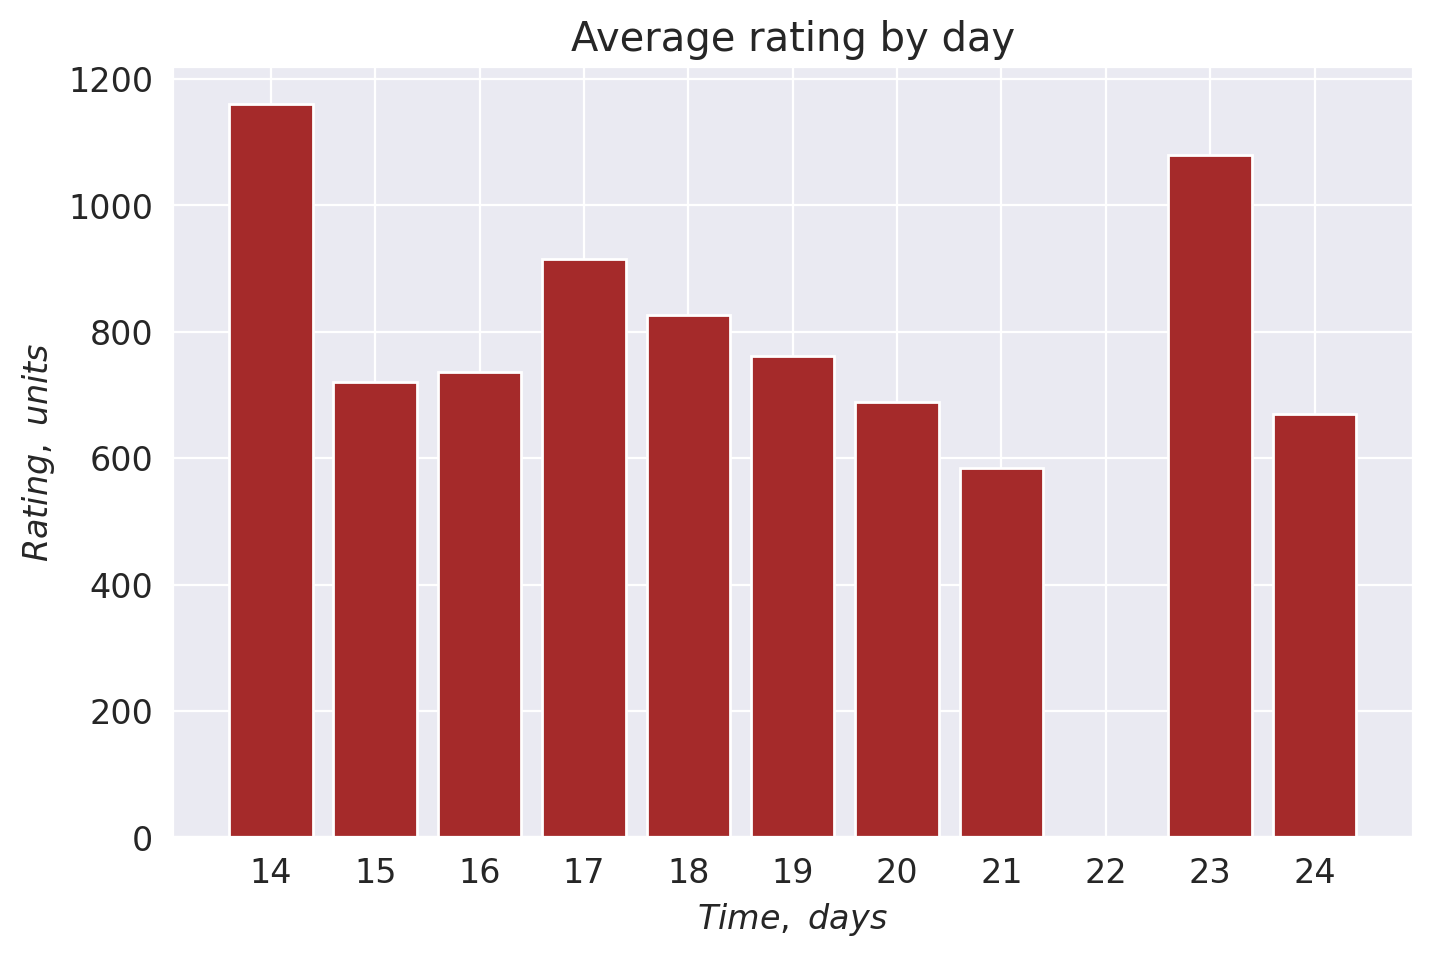

In [ ]:
fig, ax = plt.subplots()
ax.bar(barPlot['timestamp'], barPlot['rating'], color='brown')
plt.title('Average rating by day', loc ='center')
plt.xlabel('$Time,\ days$')
plt.ylabel('$Rating,\ units$')
ax.set_xticks(np.linspace(barPlot['timestamp'].min(), barPlot['timestamp'].max(), 11))

# plt.savefig('rating.pdf', bbox_inches='tight', dpi=100)
plt.show()

## 2. Распределение студентов по курсам.

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:

По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.
Обращаем ваше внимание на следующие детали:

Конкурс на каждый курс общий для 3-го и 4-го курса

По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — fall_1 и fall_2, второй приоритет — fall_3. Такие студенты участвуют только в двух волнах отбора.

Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются. Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

Постарайтесь воздержаться от использования циклов там, где это возможно. Допустимо итерироваться по курсам, на которые проводится отбор, и по волнам отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. Дублирование кода не признается успешным избавлением от циклов

На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

Три колонки: ID, course1, course2

Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"

Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"

Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.

hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)

Для работы вам могут понадобиться следующие данные:

Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

Соответствие номеров групп специализациям:

171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР

У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student

' и 'is_mi' соответственно.

Ограничения по количеству мест на курсах по выбору:

Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ( бесконечное число мест
 мест)

Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).

Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

## 0. Проверка
Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [ ]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

## 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент
В этом вам может помочь информация о специализации и группе стундента.

In [ ]:
df.head(5)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,15,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,15,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,15,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,15,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,15,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0


In [ ]:
# Создаём признак с кол-вом курсов

df['numFallCourses'] = 1

df.loc[df['17_group'].isin([171.0, 172.0, 173.0]), 'numFallCourses'] = 2
df.loc[(df['is_mi'] == 1), 'numFallCourses'] = 2

Проверка:

In [ ]:
col_name = 'numFallCourses'

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

## 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [ ]:
dfFall = df[['id', 'fall_1',	'fall_2',	'fall_3', 'percentile', 'numFallCourses']]

In [ ]:
dfFall.head()

,id,fall_1,fall_2,fall_3,percentile,numFallCourses
0,93ff79a51cd602f1dd3028ba2c129503,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,0.183857,1
1,26b01b1c4cd5656bab18d24c548834fb,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,0.426009,1
2,30f3653fc176d54e89ac3179c455c6dd,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,0.538117,1
3,1528f0eaa027580820ccf0d92a53ad68,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,0.744395,1
4,496ea4f0d4abe264b1bb1b80eb3830c5,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,0.780269,1


In [ ]:
# Добавляем кол-во мест на курсе для первого и второго приоритета

dfFall.insert(loc= len(dfFall.columns) , column='numStud_1', value=30)
dfFall.loc[dfFall['fall_1'].isin(['Statistical Learning Theory', 'Высокопроизводительные вычисления']), 'numStud_1'] = 60
dfFall.loc[dfFall['fall_1'].isin(['Анализ неструктурированных данных']), 'numStud_1'] = 1000

dfFall.insert(loc= len(dfFall.columns) , column='numStud_2', value=30)
dfFall.loc[dfFall['fall_2'].isin(['Statistical Learning Theory', 'Высокопроизводительные вычисления']), 'numStud_2'] = 60
dfFall.loc[dfFall['fall_2'].isin(['Анализ неструктурированных данных']), 'numStud_2'] = 1000

In [ ]:
# Создаём дубликаты студентов, выбрающих два курса

dfFall1 = dfFall[dfFall['numFallCourses'] == 2][['id',	'fall_2',	'percentile',	'numFallCourses', 'numStud_2']] \
          .rename(columns={'fall_2' : 'fall_1', 'numStud_2': 'numStud_1'})

dfFall = pd.concat([dfFall, dfFall1], ignore_index=True)

In [ ]:
# Добавляем вспомогательный столбец
dfFall['fall_11'] = dfFall['fall_1']

# Функция для итерирования, но не используя циклы напрямую
i = 0
name = 'Statistical Learning Theory'
def f1(x):
  global i
  global name
  if x != name:
    i = 0
  name = x
  i += 1
  return(i)

In [ ]:
# Здесь находим кол-во человек, записавшихся на курсы
# То есть можем определить заполненность курсов

test = dfFall.groupby(['fall_1', 'id', 'percentile', 'numStud_1']) \
             .agg({'fall_11' : 'first'}) \
             .sort_values(by=['fall_1', 'percentile'], ascending=[True, True]) \
             .agg({'fall_11' : [f1]}) \
             .fall_11 \
             .reset_index()

In [ ]:

test['isFull'] = test['numStud_1'] - test['f1'] == 0  # Создаём столбец, показывающий заполнен ли курс или нет

isFullCourses = test[test['isFull'] == True]['fall_1'].tolist()  # Создаём список для заполненных курсов

test.loc[test['fall_1'].isin(isFullCourses), ['isFull']] = True  # Дублируем признак заполннености для всех строчек

In [ ]:
test = test.merge(test[test['isFull'] == False].groupby(['fall_1']) \
                                               .agg({'f1' : 'max'}) \
                                               .reset_index() \
                                               .rename(columns={'f1' : 'maxf1'}),
                                                on='fall_1', how='left')

In [ ]:
# Создаём столбцы для проверки

test['is_last_place'] = NaN
test['is_first_place'] = NaN

test.loc[((test['f1'] - test['maxf1'] == 0) | (test['numStud_1'] - test['f1'] == 0)), ['is_last_place']] = True
test.loc[(test['f1'] == 1), ['is_first_place']] = True

In [ ]:
# Объединяем датафрейм для проверки

dfdf = df.merge(test[['id', 'is_last_place', 'is_first_place']], on='id', how='left').drop_duplicates()

Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:

1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
(True / NaN)

2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [ ]:
!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('2_task_check.csv')

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [ ]:
fir_col_name = 'is_first_place'      # insert name of your new column with is_first_place as str
last_col_name = 'is_last_place'     # insert name of your new column with is_last_place as str


assert((dfdf[dfdf[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((dfdf[dfdf[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()


## 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [ ]:
test['fall_1_entered'] = (test['numStud_1'] >= test['f1'])

In [ ]:
test.head(1)

,fall_1,id,percentile,numStud_1,f1,isFull,maxf1,is_last_place,is_first_place,fall_1_entered
0,Statistical Learning Theory,3a7326c9e355a67d3805824ca34c4bc5,0.0,60,1,False,33.0,NaN,True,True


In [ ]:
res_fall = test.query('fall_1_entered == True')[['id', 'fall_1']]

res_fall = res_fall[res_fall['id'].duplicated() == False] \
                                  .merge(res_fall[res_fall['id'].duplicated() == True], on='id', how='left') \
                                  .rename(columns={'fall_1_x' : 'course1', 'fall_1_y' : 'course2'})  # Создал датафрейм со студентами, прошедшими в первую волну

res_fall.loc[res_fall.course2.isna(), ['course2']] = '-'

### Вторая волна отбора

In [ ]:
df1 = df

test['numPlaces'] = test['numStud_1'] - test['maxf1']  # Кол-во свободных мест на курсе

df1 = df1.merge(test[['fall_1', 'numPlaces']].rename(columns={'fall_1' : 'fall_2'}) \
                                             .groupby(['fall_2']) \
                                             .agg({'numPlaces':'max'}), on='fall_2', how='left')

df1 = df1[['id', 'fall_2', 'fall_3', 'percentile', 'numFallCourses', 'numPlaces']]


# Студенты с количествои курсов в первой волне участвуют во второй волне только с fall_3

dfFall1 = df1.drop(columns=['fall_2'])[df1['numFallCourses'] == 2].rename(columns={'fall_3' : 'fall_2'})

df1 = pd.concat([df1.drop(columns=['fall_3']).query('numFallCourses == 1'), dfFall1], ignore_index=True)

df1 = df1[df1['fall_2'].isin(test.query('isFull == False')['fall_1'].tolist())]  # Отобрал в новый датафрейм курсы, которые еще не заполнены

df1 = df1[(df1['id'].isin(test[test['fall_1_entered'] == True].id.tolist()) == False)]

In [ ]:
# Добавляем вспомогательный столбец
df1['fall_22'] = df1['fall_2']

# Функция для итерирования, но не используя циклы напрямую
i = 0
name = 'Statistical Learning Theory'
def f2(x):
  global i
  global name
  if x != name:
    i = 0
  name = x
  i += 1
  return(i)

In [ ]:
# Ранжируем людей, которые проходят конкурс по второй волне

test1 = df1.groupby(['fall_2', 'id', 'percentile', 'numPlaces']) \
          .agg({'fall_22' : 'first'}) \
          .sort_values(by=['fall_2', 'percentile'], ascending=[True, True]) \
          .agg({'fall_22' : [f2]}) \
          .fall_22 \
          .reset_index()



test1['isFull'] = test1['numPlaces'] - test1['f2'] == 0  # Создаём столбец, показывающий заполнен ли курс или нет

isFullCourses = test1[test1['isFull'] == True]['fall_2'].tolist()  # Создаём список для заполненных курсов

test1.loc[test1['fall_2'].isin(isFullCourses), ['isFull']] = True  # Дублируем признак заполннености для всех строчек



test1 = test1.merge(test1[test1['isFull'] == False].groupby(['fall_2']) \
                                                   .agg({'f2' : 'max'}) \
                                                   .reset_index() \
                                                   .rename(columns={'f2' : 'maxf2'}),
                                                   on='fall_2', how='left')



test1['fall_2_entered'] = (test1['numPlaces'] >= test1['f2'])



res_fall1 = test1.query('fall_2_entered == True')[['id', 'fall_2']].rename(columns={'fall_2': 'course1'})
res_fall1['course2'] = '-'

In [ ]:
res_fall[res_fall['id'].isin(res_fall1.id.tolist())]  # Проверил, что нет одинаковых айди

,id,course1,course2


In [ ]:
res_fall = pd.concat([res_fall, res_fall1], ignore_index=True)  # Нашёл студентов, прошедших в первую и во вторую волну

### Третья волна отбора

In [ ]:
df2 = df

test1['numPlaces1'] = test1['numPlaces'] - test1['maxf2']  # Кол-во свободных мест на курсе

df2 = df2.merge(test1[['fall_2', 'numPlaces1']].rename(columns={'fall_2' : 'fall_3'}) \
                                               .groupby(['fall_3']) \
                                               .agg({'numPlaces1':'max'}), on='fall_3', how='left')

df2 = df2[['id', 'fall_3', 'percentile', 'numFallCourses', 'numPlaces1']].query('numFallCourses == 1')

df2 = df2[df2['fall_3'].isin(test1.query('isFull == False')['fall_2'].tolist())]  # Отобрал в новый датафрейм курсы, которые еще не заполнены
df2 = df2[(df2['id'].isin(test1[test1['fall_2_entered'] == True].id.tolist()) == False)]
df2 = df2[(df2['id'].isin(test[test['fall_1_entered'] == True].id.tolist()) == False)]

In [ ]:
# Добавляем вспомогательный столбец
df2['fall_33'] = df2['fall_3']

# Функция для итерирования, но не используя циклы напрямую
i = 0
name = 'Statistical Learning Theory'
def f3(x):
  global i
  global name
  if x != name:
    i = 0
  name = x
  i += 1
  return(i)

In [ ]:
# Ранжируем людей, которые проходят конкурс по второй волне

test2 = df2.groupby(['fall_3', 'id', 'percentile', 'numPlaces1']) \
           .agg({'fall_33' : 'first'}) \
           .sort_values(by=['fall_3', 'percentile'], ascending=[True, True]) \
           .agg({'fall_33' : [f3]}) \
           .fall_33 \
           .reset_index()



test2['isFull'] = test2['numPlaces1'] - test2['f3'] == 0  # Создаём столбец, показывающий заполнен ли курс или нет

isFullCourses = test2[test2['isFull'] == True]['fall_3'].tolist()  # Создаём список для заполненных курсов

test2.loc[test2['fall_3'].isin(isFullCourses), ['isFull']] = True  # Дублируем признак заполннености для всех строчек



test2 = test2.merge(test2[test2['isFull'] == False].groupby(['fall_3']) \
                                                   .agg({'f3' : 'max'}) \
                                                   .reset_index() \
                                                   .rename(columns={'f3' : 'maxf3'}),
                                                   on='fall_3', how='left')


test2['fall_3_entered'] = (test2['numPlaces1'] >= test2['f3'])



res_fall2 = test2.query('fall_3_entered == True')[['id', 'fall_3']].rename(columns={'fall_3': 'course1'})
res_fall2['course2'] = '-'

In [ ]:
res_fall = pd.concat([res_fall, res_fall2], ignore_index=True)  # Нашёл студентов, прошедших в первую и во вторую волну

In [ ]:
res_fall3 = df[df['id'].isin(res_fall['id'].tolist()) == False][['id']]  # Студенты, которые не попали ни на какой курс
res_fall3.loc[:, ['course2']] = '-'
res_fall3.loc[:, ['course1']] = '???'
res_fall = pd.concat([res_fall, res_fall3], ignore_index=True)

res_fall3 = df.query('numFallCourses == 2')[(df['id'].isin(res_fall[(res_fall['course2'] == '-') & (res_fall['course1'] != '-')]['id'].tolist()) == True)][['id']]  # Студенты, которые не попали ни на какой курс
res_fall.loc[res_fall['id'].isin(res_fall3.id.tolist()), ['course2']] = '???'

<ipython-input-946-362c85235a94>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_fall3 = df.query('numFallCourses == 2')[(df['id'].isin(res_fall[(res_fall['course2'] == '-') & (res_fall['course1'] != '-')]['id'].tolist()) == True)][['id']]  # Студенты, которые не попали ни на какой курс


In [ ]:
res_fall  # Полный список студентов и курсов

,id,course1,course2
0,3a7326c9e355a67d3805824ca34c4bc5,Statistical Learning Theory,Высокопроизводительные вычисления
1,723d5f32b699c971b4095a017c883ffa,Statistical Learning Theory,-
2,b3cbd3541c0cf66ff4eb2bc1596bb149,Statistical Learning Theory,Байесовские методы машинного обучения
3,1f63fc485d851236249263b91dc03d6b,Statistical Learning Theory,-
4,e4caca755ee0bdd711e18fb8084958b5,Statistical Learning Theory,-
...,...,...,...
342,aeb7bb1e047c392b7e5e39225cd86422,???,-
343,d40cbae8cfc9e6c5d05831ef7e122f3e,???,???
344,07b6ce7fd93bde95ce5fe14a5131a960,???,-
345,085da16dd3062b4790c3dabdc08a51cf,???,-
